# Практическая работа №2: Классические методы математической статистики
Выполнил студент гр.1374 Баснина Виктория. Вариант 2

## Тема работы
Классические методы математической статистики

## Цель работы
Научится применять методы математической статистики для решения задач статистического анализа; сформировать навыки реализации методов с помощью прикладных программных пакетов.

## Постановка задачи
Для полученных в результате эксперимента наборов данных выполнить статистическую обработку. Полученные результаты содержательно проинтерпретировать.

## Основные теоретические положения  
$\mathbb{E}_\xi=\bar{x}=\cfrac{1}{n}\sum_{i=1}^nx_i$  
$\mathbb{D}_\xi=S^2=\cfrac{\sum_{i=1}^n(x_i-\bar x)^2}{n}$  
$\sigma=\sqrt{S^2}$  
$Me=\cfrac{x_{\cfrac{n}{2}}+x_{\cfrac{n}{2}+1}}{2}$  
$\widehat{Skew}=\cfrac{\cfrac{\sum_{i=1}^n(x_i-\bar x)^3}{n}}{S^3}$    
$\widehat{Kurt}=\cfrac{\cfrac{\sum_{i=1}^n(x_i-\bar x)^4}{n}}{S^4}$   
$\mathbb{P}(X\in[a,b])=F(b)-F(a)$  
Оценка максимального правдоподобия (ОМП):  
$X_{1},...,X_{n}$-выборка из распределения с плотностью распределения $P_{\theta}, \theta\in \Theta$  
Функция правдоподобия:$L(\bar{X},\theta)=\prod_{i=1}^{n}P_{\theta}(X_{i})$  
Логарифм функции правдоподобия:$LL(\bar{X},\theta)=\ln L(\bar{X},\theta)=\sum_{i=1}^{n}\ln P_{\theta}(X_{i})$
$\theta\in \Theta  LL(\bar{X}),\theta=\sum_{i=1}^{n}\ln P_{\theta}(X_{i})$  
При $\theta$ - d-мерный параметр и $P_{\theta}$ дифференцируема по $\theta$: U$(\bar{X},\theta)=\frac{\partial }{\partial \theta}LL(\bar{X},\theta)=0, i=\overline{1,d}$  
Оценка метода моментов (ОММ)  
$X_{1},...,X_{n}$-выбока из распределения $P_{\theta}, \theta=(\theta_{1},...,\theta_{d})$
$\exists \mu_{k}(\theta)=\mathbb{E}X^{k}_{1}, k=\overline{1,d}$  
Если $\exists$ ! решение $\widetilde{\theta}(X)$ системы уравнений: $\widehat{\mu^{k}}(\widetilde{\theta})=\mu_{k}(\theta), k=\overline{1,d}$, где $\widetilde{\theta}(X)=\frac{1}{n}\sum_{i=1}^{n}X^{k}_{i}$-выборочный момент k-го порядка, то $\widetilde{\theta}(X)$ - оценкой по методу моментов  НРМД-оценки (несмещенная оценка)  
Оценка $\widehat{\theta}(X)$ параметра $\theta$ называется несмещенной, если при любом значении параметра $\theta\in \Theta: \mathbb{E}\widehat{\theta}(X)=\theta$  
Смещение оценки : $bias_{\widehat{\theta}}(\theta)=\mathbb{E}_{\theta}\widehat{\theta}(X)-\theta$  
МДС является ПДС, когда распределение относится к экспоненциальному семейству.  $\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N\left( 0, \frac{1}{I(\theta)} \right)$    
$I(\theta)=-\mathbb{E}\left( \frac{\partial^{2} LL}{\partial \lambda^{2}} \right)=-\mathbb{E}\left( -\frac{\sum_{i=1}^{n}X_{i}}{\lambda^{2}} \right)=\frac{n}{\lambda^{2}}$      
Критерий $\chi^2$ для проверки гипотез:  
$\mathcal{X}^{2}_{набл}=\sum_{i=1}^{len(I[i])}\frac{(n_{i}-np_{i})^{2}}{np_{i}}$  
Если $\mathcal{X}^{2}_{N-1,1-\alpha_{1}} \lt \chi^2_{набл}$, то гипотезу отвергаем  
Если $\mathcal{X}^{2}_{N-1,1-\alpha_{1}} \gt \chi^2_{набл}$, то гипотезу принимаем    
$X_{1},...,X_{n}$ - выборка объема n , порождённая случайной величиной, которая задаётся непрерывной функцией распределения F(x). Пусть $F_{n}(x)$ — выборочная функция распределения. Тогда $D_{n}(\bar{X}) = \overset{}{\underset{X \in \mathbb R}{sup}} |F_{0}(X_{i}) - F_{n}(X_{i})|$  
$P(\sqrt{n} D_{n}(\bar{X}) < z_{\gamma}) \xrightarrow[n \rightarrow \infty]{} K(z_{\gamma})$, где  
$z_{\gamma}$- квантиль уровня $\gamma$  закона распределения Колмогорова.     
Вероятность $\gamma$  называют уровнем значимости.нем з_{\gamma}начимости.
$K(z)=1-\alpha$ - ф-я распределен  ия Если $D_{n} \lt z_{\gamma}$, то гипотезу принимаем  
Если $D_{n} \gt z_{\gamma}$, то гипотезу отвергаемотезу отвергаемная величина, имеющая распределение Колмогорова.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as sp
from scipy.stats import expon
from scipy.stats import kstwobign
from scipy.stats import kstest
from scipy.stats import laplace
from scipy.optimize import minimize

**Задание 1   
Дано: 0 2 3 0 1 1 1 0 0 0 1 1 1 1 3 2 0 0 0 0 0 1 1 0 1 0 1 2 2 1 0 0 0 0 0 0 0 2 0 1 0 0 2 2 0 1 0 0 1 0     
a) Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот**

In [3]:
def count_rate(data: list):
    rate = {}
    for i in data:
        if i in rate:
            continue
        else:
            rate[i] = data.count(i)
    return rate
def sort_rate(counted_rate: dict):
    sorted_rate = {}
    for key in sorted(counted_rate.keys()):
        sorted_rate[key] = counted_rate[key]
    return sorted_rate
def crate_dataframe(sorted_date: dict):
    df = pd.DataFrame(sorted_date, index=[0])
    df = df.T
    df = df.rename(columns={0: 'Количество'})
    return df
def probability_solving(dataframe: pd.DataFrame):
    sum_rate = dataframe['Количество'].sum()
    probability = []
    for i in dataframe['Количество']:
        probability.append(i / sum_rate)
    dataframe['Частота'] = probability
    return dataframe
def empir_func(dataframe: pd.DataFrame):
    sum_rate=0
    empir = []
    for i in dataframe['Частота']:
        sum_rate+=i
        empir.append(float(sum_rate))
    return empir
print("Задание 1")
a=[0, 2, 3, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 3, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0,0, 1, 0]
n=len(a)
print("Дано:",end=" ")
print(*a)
print ("n =",n)
asort=a.copy()
asort.sort()
print ("Вариационный ряд:", end=" ")
print(*asort)
rate=count_rate(a)
rate=sort_rate(rate)
print(*rate)
df=crate_dataframe(rate)
df=probability_solving(df)
empir=empir_func(df)
print(df)
print(empir)

Задание 1
Дано: 0 2 3 0 1 1 1 0 0 0 1 1 1 1 3 2 0 0 0 0 0 1 1 0 1 0 1 2 2 1 0 0 0 0 0 0 0 2 0 1 0 0 2 2 0 1 0 0 1 0
n = 50
Вариационный ряд: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3
0 1 2 3
   Количество  Частота
0          26     0.52
1          15     0.30
2           7     0.14
3           2     0.04
[0.52, 0.8200000000000001, 0.9600000000000001, 1.0]


Эмпирическая функция распределения
$$ F(x) =
\begin{cases}
0,\; если\; -\infty < x \leq 0 \\
0.52,\; если \; 0 < x \leq 1 \\
0.82,\; если \; 1 < x \leq 2 \\
0.96,\; если \; 2 < x \leq 3 \\
1,\; если\; 3 < x \leq +\infty \\
\end{cases} $$

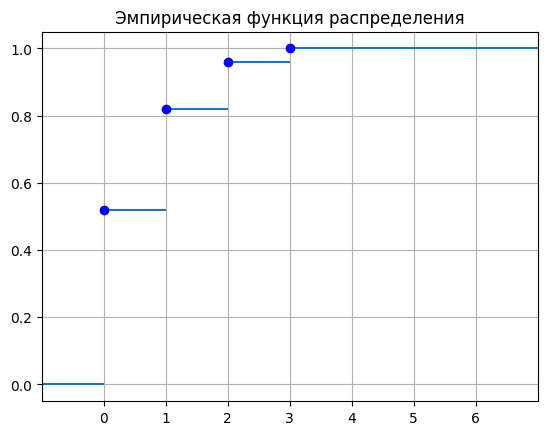

In [4]:
df1={}
for i in range(0, len(rate)):
 df1.update({i: float(empir[i])})
df1.update({-2: 0})
df1.update({7: 1})
plt.xlim(-1, 7)
plt.title('Эмпирическая функция распределения')
plt.xticks([x for x in range(0, 7)])
plt.grid()
d1_un = [-2, *rate, 7]
for i in range(0, len(rate)+1):
 plt.hlines(y=df1[d1_un[i]], xmin=d1_un[i], xmax=d1_un[i+1])
 plt.plot(d1_un[i], df1[d1_un[i]], marker='o',color='b')
plt.show()

Text(0.5, 1.0, 'Гистограмма частот с h=1')

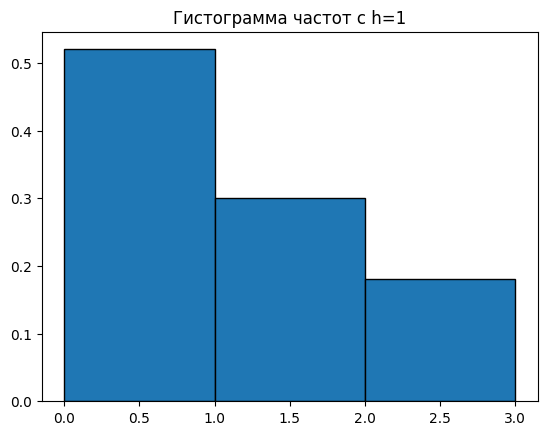

In [5]:
plt.hist(asort, bins=int((3-0)/1),weights=np.ones_like (asort) / len (asort),edgecolor='black')
plt.title("Гистограмма частот с h=1")

**b) Вычислить выборочные аналоги следующих числовых характеристик: (i) математического ожидания, (ii)дисперсии, (iii) медианы, (iv)ассиметрии, (v)эксцесса, (vi)вероятности** $\mathbb{P}(X\in[a,b])$ **при** $a=0.00$ $b=1.20$ 

In [6]:
E=sum(asort)/n
print (E)
deviations = [(x - E) ** 2 for x in asort] 
D = sum(deviations) / n 
print (D)
SKO=D**(1/2)
print (SKO)
if n % 2: 
    Me=(asort)[n//2] 
else:
    Me=sum((asort)[n//2 - 1:n//2 + 1]) / 2 
print (Me)
deviations = [(x - E) ** 3 for x in asort]
Skew=sum(deviations) / (n *(SKO**3))
print (Skew)
deviations = [(x - E) ** 4 for x in asort]
Kurt=sum(deviations) / (n *(SKO**4))-3
print (Kurt)

0.7
0.73
0.8544003745317531
0.0
1.0004613130189788
0.08969787952711572


b)$\mathbb{E}_\xi=\bar{x}=\cfrac{1}{n}\sum_{i=1}^nx_i=0.7$  
$\mathbb{D}_\xi=S^2=\cfrac{\sum_{i=1}^n(x_i-\bar x)^2}{n}=0.73$  
$\sigma=\sqrt{S^2}=0.85$  
$Me=\cfrac{x_{\cfrac{n}{2}}+x_{\cfrac{n}{2}+1}}{2}=0$  
$\widehat{Skew}=\cfrac{\cfrac{\sum_{i=1}^n(x_i-\bar x)^3}{n}}{S^3}=1.0005$    
$\widehat{Kurt}=\cfrac{\cfrac{\sum_{i=1}^n(x_i-\bar x)^4}{n}}{S^4}-3=0.09$   
$a=0.00$ $b=1.20$  
$\mathbb{P}(X\in[a,b])=F(b)-F(a)=0.82-0=0.82$

**c) В предположении, что исходные
наблюдения являются выборкой из
распределения Пуассона, построить
оценку максимального правдоподобия
параметра , а также оценку по
методу моментов**

c) $x_1,\cdots x_{50}\sim \mathcal{Pois}(\lambda)$  
$\mathbb{P}_\lambda(x=i)=\cfrac{\lambda^i}{i!}e^{-\lambda}$  
Оценка максимального правдоподобия параметра $\lambda$:  
$L(x_1, \cdots, x_{50};\lambda) =\prod_{i=1}^{50}\cfrac{\lambda^x_i}{x_i!}e^{-\lambda}$  
$LL(x_1, \cdots, x_{50};\lambda)=\ln e^{−nλ} +\ln λ^{\sum_{i=1}^{50}} − \ln {\sum_{i=1}^{50}x_i}$   
$\cfrac{\delta LL(x_1, \cdots, x_{50};\lambda)}{\delta\lambda}=-n+\cfrac{\sum_{i=1}^{50}x_i}{\lambda}=0$    
$\widehat{\lambda}=\bar{x}=0.7$  
Оценка методом моментов параметра $\lambda$:   
Теоретический момент первого порядка в распределении Пуассона: $\mathbb{E}(X_1)=\lambda$  
Эмпирический момент первого порядка: $M_1=\bar{x}=\cfrac{1}{n}\sum_{i=1}^nx_i$  
Тогда: $\widehat{\lambda}=\bar{x}=0.7$   
$\widehat{\lambda}=\bar{x}$  - ОМП  
$T=\sum_{i=1}^nx_i$-МДС и ПДС, так как распределение Пуассона относится к экспоненциальному семейству.  
$g\left(T(\overrightarrow{X})\right)=\lambda^{\sum_{i=1}^{n}x_{i}}\cdot exp(-n\cdot \lambda)$  
$h(\overrightarrow{X})=\frac{1}{\prod_{i=1}^{n}x_{i}!}$  
$\mathbb{E}_{\lambda}(\bar x)=\mathbb{E}_{\lambda}\cfrac{1}{n}\sum_{i=1}^nx_i=\cfrac{1}{n}\mathbb{E}_{\lambda}\sum_{i=1}^nx_i=\cfrac{1}{n}\cdot n\lambda=\lambda=0.7$ - НРМД

**d) Построить асимптотический
доверительный интервал уровня
значимости для параметра на
базе оценки максимального
правдоподобия**

In [7]:
left_border = E - (2.33 * math.sqrt(E) / n)
right_border = E + (2.33 * math.sqrt(E) / n)
print(left_border,right_border)

0.661011642763512 0.7389883572364879


d) $\alpha_1=0.01$  
$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N\left( 0, \frac{1}{I(\theta)} \right)$  
$\widehat{\lambda}=\overline{X}$  
$I(\theta)=-\mathbb{E}\left( \frac{\partial^{2} LL}{\partial \lambda^{2}} \right)=-\mathbb{E}\left( -\frac{\sum_{i=1}^{n}X_{i}}{\lambda^{2}} \right)=\frac{n}{\lambda^{2}}$  
Тогда $\sqrt{n\cdot I\left(  \widehat{\theta}(\overrightarrow{X})\right)}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,1)$  
$\mathbb{P}(\bar x-\cfrac{x_\alpha\bar x}{\sqrt{n}}\leq\lambda\leq\bar x+\cfrac{x_\alpha\bar x}{\sqrt{n}})=2\Phi_0(x_\alpha)=1-\alpha_1$  
$x_\alpha=\Phi^{-1}_0(\cfrac{1-\alpha_1}{2})=\Phi^{-1}_0(0.49)\approx2.33$  
$\left[ \overline{X}-\frac{X_{0.99}}{\sqrt{50\cdot \frac{50}{\overline{X}}}}; \overline{X}+\frac{X_{0.99}}{\sqrt{50\cdot \frac{50}{\overline{X}}}}\right] $   
$0.661\le \lambda\le 0.739$ - АДИ параметра $\lambda$.

**e)Используя гистограмму частот, построить критерий значимости** $\mathcal{X^{2}}$ **проверки простой гипотезы согласия с распределением Пуассона с параметром** $\lambda_{0}$. **Проверить гипотезу на урокень значимости $\alpha_{1}$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.**

In [8]:
lam0=0.7
I = [(-math.inf, 0), (0, 1), (1, 2), (2, 3)]
n_i = [26,15, 7, 2]
p_i = []
np_i = []
n_i_np_i = []
res = []
for i in I:
 p_i.append(round(sp.poisson.cdf(i[1], lam0) - sp.poisson.cdf(i[0], lam0), 4))
print(p_i)
for i in range (4):
 np_i.append(round(n*p_i[i], 4))
print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print(res, sum(res))
print(1 - sp.chi2.cdf(sum(res), 4))

[0.4966, 0.3476, 0.1217, 0.0284]
[24.83, 17.38, 6.085, 1.42]
[0.0551, 0.3259, 0.1376, 0.2369] 0.7555
0.9443123708778196


e)$\lambda_0=0.70 \:\alpha_1=0.01$  
$I_{1}=\left(-\infty,0 \right], n_{1}=26$  
$P_{1}=\frac{0.7^{0}}{0!}exp(-0.7)-\frac{0.7^{-\infty}}{-\infty!}exp(-0.7)=0.497\: nP_{1}=24.83$  
$I_{2}=\left(0,1\right], n_{2}=15$  
$P_{2}=\frac{0.7^{1}}{1!}exp(-0.7)-\frac{0.7^{0}}{0}exp(-0.7)=0.348\: nP_{2}=17.38$  
$I_{3}=\left( 1,2 \right], n_{3}=7$  
$P_{3}=\frac{0.7^{2}}{2!}exp(-0.7)-\frac{0.7^{1}}{1!}exp(-0.7)=0.122\: nP_{3}=6.085$  
$I_{4}=\left(2,3 \right], n_{4}=2$  
$P_{4}=\frac{0.7^{3}}{3!}exp(-0.7)-\frac{0.7^{2}}{2!}exp(-0.7)=0.028\: nP_{4}=1.42$  
Критерий $\mathcal{X}^{2}: \mathcal{X}^{2}_{набл}=\sum_{i=1}^{4}\frac{(n_{i}-np_{i})^{2}}{np_{i}} =0.755$  
$\mathcal{X}^{2}_{N-1,1-\alpha_{1}}=\mathcal{X}^{2}_{3,0.99}\approx 11.34$  
$\mathcal{X}^{2} <\mathcal{X}^{2}_{3,0.99}$ - нет оснований отвергнуть гипотезу (критерий Пирсона)  
$F^{-1}_{\mathcal{X}^{2}_{3}}(1-\widehat\alpha)=\mathcal{X}^2$  
$\widehat\alpha=1-F_{\mathcal{X}^{2}_{3}}(\mathcal{X}^{2})=0.944$  

**f)Построить критерий значимости**  $\mathcal{X^{2}}$ **проверки сложной гипотезы согласия с распределением Пуассона. Проверить гипотезу по уровню значимости** $\alpha_{1}$ **.Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.**

In [9]:
def chi_squared(x):
 p_min = []
 res_min = 0
 for i in I:
     p_min.append(sp.poisson.cdf(i[1], x) - sp.poisson.cdf(i[0], x))
 for i in range(len(n_i)):
     res_min += ((n_i[i]-n*p_min[i])**2)/(n*p_min[i])
 return res_min
theta_minimized = float(minimize(chi_squared, lam0).x)
print(theta_minimized, chi_squared(theta_minimized))
print(1 - sp.chi2.cdf(chi_squared(theta_minimized), 4))

0.7262963583535006 0.7058511681814481
0.9506053972516936


C:\Users\asus\AppData\Local\Temp\ipykernel_10896\1363335953.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta_minimized = float(minimize(chi_squared, lam0).x)


f) $\lambda_0=0.70 \:\alpha_1=0.01$  
Минимализируем функцию:$\mathcal{X}^{2}(\theta)=\sum_{i=1}^{4}\frac{(n_{i}-np_{i}(\theta))^{2}}{np_{i}(\theta)}$  
$min(\mathcal{X}^{2}(\theta))= 0.706$ при $\theta=0.726$  
$\mathcal{X}^{2}_{N-1,1-\alpha_{1}}=\mathcal{X}^{2}_{3,0.99}\simeq 11.345>\mathcal{X}^{2}(\theta)$  - нулевую гипотезу нельзя отвергнуть.     Найдём значение уровня 
значимости, на котором ещё нет оснований отвергнуть данную гипотезу  
$F^{-1}_{\mathcal{X}^2_3}(1-\alpha)=\mathcal{X}^2$    
$\alpha=1-F_{\mathcal{X}^2_3}(\mathcal{X}^2)=0.95$ :

**g)Построить наиболее мощный критерий проверки простой гипотезы пауссоновости с параметром** $\lambda=\lambda_{0}$ **при альтернативе пуассоновсти с параметром** $\lambda=\lambda_{1}$. **Проверить гипотезу на уровне значимости** $\alpha_{1}$. **Что получится, если поменять местами основную и альтернативную гипотезы?**

g) $\lambda_0=0.7 \:\lambda_1=2.8 \:\alpha_1=0.01$  
$H_{0}=\lambda_{0}\:H_{A}=\lambda_{1}$  
$LR(\bar{X},\lambda_{1},\lambda_{0}) = \frac{L\left( \bar{X},\lambda_{1} \right)}{L\left( \bar{X},\lambda_{0} \right)}= \frac{\lambda_{1}^{\sum_{i=1}^{50}X_{i}}\cdot exp(-n\cdot \lambda_{1})}{\lambda_{0}^{\sum_{i=1}^{50}X_{i}}\cdot exp(-n\cdot \lambda_{0})}$    
$LR(\bar{X})$ монотонна относительно МДС $T(\bar{X})=\sum_{i=1}^{50}X_{i}$    
$LR(\bar{X},\lambda_{0},\lambda_{1})\gt c$   
$\overline{X}\gt c$  
$\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}}\sim N(0,1)$  
$P\left(\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}} \right)\gt \sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}}=1-\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}} \right)=\alpha_{1}$  
$\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}} \right)=1-\alpha_{1}=0.99$    
$$ \phi(x) =
\begin{cases}
0,\; если\: \bar X>c, \lambda_0=0.7\\
1,\; если\: \bar X<c, \lambda_0=0.7\\
\end{cases} $$
$\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}}\gt \sqrt{n}\frac{c-\lambda_{0}}{\sqrt{\overline{X}}}=2.3\: c=0.97\gt \overline{X}$ - гипотезу отвергаем    
$H_{0}=\lambda_{1}$
$H_{A}=\lambda_{0}$  
$LR(\bar{X},\lambda_{0},\lambda_{1}) = \frac{L\left( \bar{X},\lambda_{0} \right)}{L\left( \bar{X},\lambda_{1} \right)}= \frac{\lambda_{0}^{\sum_{i=1}^{50}X_{i}}\cdot exp(-n\cdot \lambda_{0})}{\lambda_{1}^{\sum_{i=1}^{50}X_{i}}\cdot exp(-n\cdot \lambda_{1})}$    
$\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}}\sim N(0,1)$   
$P\left(\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}} \right)\gt \sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}}=1-\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}} \right)=\alpha_{1}$  
$\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}} \right)=1-\alpha_{1}=0.99$ 
$$ \phi(x) =
\begin{cases}
0,\; если\: \bar X>c, \lambda_1=2.8\\
1,\; если\: \bar X<c, \lambda_1=2.8\\
\end{cases} $$
$\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}}\gt \sqrt{n}\frac{c-\lambda_{1}}{\sqrt{\overline{X}}}=2.3\: c=3.07\gt \overline{X}$ - гипотезу отвергаем  
Если поменять местами основную и альтернативную гипотезы, то вместо статистики отношения правдоподобия мы будем рассчитывать ее обратное значение.

**h.c)В предположении, что исходные наблюдения являются выборкой из геометрического распределения, построить ОМП и ОММ параметра** $\lambda$ **.Найти смещение оценки.**

h.c) $x_1,\cdots x_{50}\sim \mathcal{Geom}(\lambda)$  
$\mathbb{P}_\lambda(x=k)=\cfrac{\lambda^{k}}{(\lambda+1)^{k+1}}, k\in\mathbb Z_+$   
Оценка максимального правдоподобия параметра $\lambda$:  
$L(x_1, \cdots, x_{50};\lambda) =\prod_{i=1}^{50}\cfrac{\lambda^{x_i}}{(\lambda+1)^{x_i+1}}$  
$LL(x_1, \cdots, x_{50};\lambda)=(x_1+ \cdots+ x_{50})\ln λ -(x_1+ \cdots+ x_{50}+50)\ln (λ+1)$  
$\cfrac{\delta LL(x_1, \cdots, x_{50};\lambda)}{\delta\lambda}=\cfrac{\sum_{i=1}^{50}x_i}{\lambda}-\cfrac{\sum_{i=1}^{50}x_i+50}{\lambda+1}=\cfrac{\sum_{i=1}^{50}x_i-50\lambda}{\lambda^2+\lambda}=\cfrac{\sum_{i=1}^{50}x_i}{\lambda^2+\lambda}-\cfrac{50}{\lambda+1}=0$  
$\widehat{\lambda}=\bar{x}=0.7$   
Оценка методом моментов параметра $\lambda$:  
Теоретический момент первого порядка: $\mathbb{E}(X_1)=\cfrac{1}{\lambda}$    
Эмпирический момент первого порядка: $M_1=\cfrac{1}{\bar{x}}$  
Тогда: $\widehat{\lambda}=\bar{X}=0.7$  - ОММ   
$\widehat{\lambda}=\bar{x}$  - ОМП  
$T=\sum_{i=1}^nx_i$-МДС и ПДС, так как геометрическое распределение сходится к экспоненциальному.  
$g\left(T(\overrightarrow{X})\right)=\frac{\lambda^{\sum_{i=1}^{n}x_{i}}}{(\lambda+1)^{\sum_{i=1}^{n}x_{i}+n}}$  
$h(\overrightarrow{X})=1$  
$\mathbb{E}_{\lambda}(\bar x)=\mathbb{E}_{\lambda}\cfrac{1}{n}\sum_{i=1}^nx_i=\cfrac{1}{n}\mathbb{E}_{\lambda}\sum_{i=1}^nx_i=\cfrac{1}{n}\cdot n\lambda=\lambda=0.7$ - НРМД

**h.d)Построить А.Д.И. уровня значимости** $\alpha_1$ **для параметра** $\lambda$ **на базе ОМП**

h.d) $\alpha_1=0.01$   
$\widehat{\lambda}=\bar{X}=0.7$ -ОМП
$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N\left( 0, \frac{1}{I(\theta)} \right)$  
$\sqrt{n\cdot I\left(  \widehat{\theta}(\overrightarrow{X})\right)}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,1)$
$I(\theta)=-\mathbb{E}\left( \frac{\partial^{2} LL}{\partial \lambda^{2}} \right)=-\mathbb{E}\left( -\frac{\sum_{i=1}^{n}X_{i}}{\lambda^{2}}+\frac{\sum_{i=1}^{n}X_{i}+n}{(\lambda +1)^{2}} \right)=\frac{n}{\lambda^{2}}-\mathbb{E}\left( \frac{\sum_{i=1}^{n}X_{i}+n}{(\lambda+1)^{2}} \right) = \frac{n}{\lambda^{2}}-\mathbb{E}\left( \frac{\sum_{i=1}^{n}X_{i}}{(\lambda+1)^{2}} \right)-\mathbb{E}\left( \frac{n}{(\lambda+1)^{2}} \right)=\frac{n}{\lambda^{2}}-\frac{n}{(\lambda+1)^{2}}-\frac{n}{(\lambda+1)^{2}}=\frac{n(\lambda^{2}+1)}{(\lambda+1)^{2}\cdot \lambda^{2}}$
$x_\alpha=S_{n-1}^{-1}(\cfrac{1-\alpha_1}{2})=S_{n-1}^{-1}(0.49)\approx2.33$   
$\left[ \bar{X}-\frac{x_{\alpha}}{\sqrt{n\cdot \frac{n(\widehat{\lambda^{2}}+1)}{(\widehat{\lambda}+1)^{2}\cdot \widehat{\lambda^{2}}}}};\bar{X}+\frac{x_{\alpha}}{\sqrt{n\cdot \frac{n(\widehat{\lambda^{2}}+1)}{(\widehat{\lambda}+1)^{2}\cdot \widehat{\lambda^{2}}}}} \right]$  
$0.661\le \lambda\le 0.739$ - АДИ параметра $\lambda$.

In [10]:
left_border = E - (2.33 * SKO / math.sqrt(n*n*(E**2+1)/((E+1)**2*(E**2))))
right_border = E + (2.33 * SKO / math.sqrt(n*n*(E**2+1)/((E+1)**2*(E**2))))
print(left_border,right_border)

0.6611848584802962 0.7388151415197037


**h.e)Используя гистограмму частот, построить критерий значимости** $\mathcal{X^{2}}$ **проверки простой гипотезы согласия с геометрическим распределением с параметром** $\lambda_{0}$. **Проверить гипотезу на урокень значимости** $\alpha_{1}$. **Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.**

In [11]:
def geom(x, lambd):
 res_g = 0
 for i in range(0, x + 1):
     res_g += (lambd**i)/((lambd+1)**(i+1))
 return res_g
I = [(-math.inf, 0), (0, 1), (1, 2), (2, 3)]
n_i = [26,15,7,2]
p_i = []
np_i = []
n_i_np_i = []
res = []
p_i.append(geom(0, lam0))
for i in range(1, len(n_i)):
 p_i.append(round(geom(I[i][1], lam0) - geom(I[i][0], lam0), 4))
print(p_i)
for i in range(4):
 np_i.append(round(p_i[i]*n, 4))
print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print(res, sum(res))
print(1 - sp.chi2.cdf(sum(res), 4))

[0.5882352941176471, 0.2422, 0.0997, 0.0411]
[29.4118, 12.11, 4.985, 2.055]
[0.3958, 0.6897, 0.8145, 0.0015] 1.9015
0.7538694373470622


h.e) $\lambda_0=0.70 \:\alpha_1=0.01$  
$P_{i}=P_{H_{0}}=(X\in I_{i})=\sum_{k\in I_{i}}^{}\frac{\lambda_{0}^{k}}{(\lambda_{0}+1)^{k+1}}$  
$I_{1}=\left(-\infty,0 \right], n_{1}=26$  
$P_{1}=\frac{{0.7}^{0}}{({0.7}+1)^{0+1}}-\frac{{0.7}^{-\infty}}{({0.7}+1)^{-\infty+1}}=0.588\to nP_{1}=29.412$  
$I_{2}=\left(0,1\right], n_{2}=15$  
$P_{2}=\frac{{0.7}^{1}}{({0.7}+1)^{1+1}}-\frac{{0.7}^{0}}{({0.7}+1)^{0+1}}=0.242\: nP_{2}=12.11$  
$I_{3}=\left( 1,2 \right], n_{3}=7$  
$P_{3}=\frac{{0.7}^{2}}{({0.7}+1)^{2+1}}-\frac{{0.7}^{1}}{({0.7}+1)^{1+1}}=0.099\: nP_{3}=4.985$  
$I_{4}=\left(2,3 \right], n_{4}=2$  
$P_{4}=\frac{{0.7}^{3}}{({0.7}+1)^{3+1}}-\frac{{0.7}^{2}}{({0.7}+1)^{2+1}}=0.041\: nP_{4}=2.055$  
Критерий $\mathcal{X}^{2}: \mathcal{X}^{2}_{набл}=\sum_{i=1}^{4}\frac{(n_{i}-np_{i})^{2}}{np_{i}} =1.902$  
$\mathcal{X}^{2}_{N-1,1-\alpha_{1}}=\mathcal{X}^{2}_{3,0.99}\approx 11.345$  
$\mathcal{X}^{2}< \mathcal{X}^{2}_{3,0.99}$ - нет оснований отвергнуть гипотезу(критерий Пирсона) 
$F^{-1}_{\mathcal{X}^2_3}(1-\alpha)=\mathcal{X}^2$    
$\alpha=1-F_{\mathcal{X}^2_3}(\mathcal{X}^2)\approx 0.754$ :

**h.f)Построить критерий значимости**  $\mathcal{X^{2}}$ **проверки сложной гипотезы согласия с геометрическим распределением. Проверить гипотезу по уровню значимости** $\alpha_{1}$.**Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.**

In [12]:
def chi_squared(x):
 p_min = geom(0, x)
 res_f = ((n_i[0]-n*p_min)**2)/(n*p_min)
 for i in range(1, len(n_i)):
     p_min = geom(I[i][1], x) - geom(I[i][0], x)
     res_f += ((n_i[i]-n*p_min)**2)/(n*p_min)
 return res_f
theta_minimized = float(minimize(chi_squared, lam0).x)
print(theta_minimized, chi_squared(theta_minimized))
print(1 - sp.chi2.cdf(chi_squared(theta_minimized), 4))

0.9172353372887041 0.9450147197216162
0.9180157559891935


C:\Users\asus\AppData\Local\Temp\ipykernel_10896\1636489139.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta_minimized = float(minimize(chi_squared, lam0).x)


h.f) $\lambda_0=0.70 \:\alpha_1=0.01$  
Минимализируем функцию:$\mathcal{X}^{2}(\theta)=\sum_{i=1}^{4}\frac{(n_{i}-np_{i}(\theta))^{2}}{np_{i}(\theta)}$  
$min(\mathcal{X}^{2}(\theta))= 0.945$ при $\theta=0.917$  
$\mathcal{X}^{2}_{N-1,1-\alpha_{1}}=\mathcal{X}^{2}_{3,0.99}\approx 11.345>\mathcal{X}^{2}(\theta)$  
Следовательно нулевую гипотезу нельзя отвергнуть. Найдём значение уровня
значимости, на котором ещё нет оснований отвергнуть данную гипотезу:  
$F^{-1}_{\mathcal{X}^2_3}(1-\alpha)=\mathcal{X}^2$    
$\alpha=1-F_{\mathcal{X}^2_3}(\mathcal{X}^2)=0.918$ 

**Задание 2  
Дано: 2.885 3.276 2.277 5.621 2.38 1.092 2.935 1.508 4.027 3.691 4.022 2.416 1.857 2.312 2.372 1.679 2.233 2.839 4.865 3.2 2.371 4.502 2.547 2.107 3.353 2.544 4.214 1.656 2.869 2.831 2.45 1.912 4.334 3.692 2.74 0.878 2.673 3.34 3.331 4.203 4.25 2.549 4.355 2.468 2.51 2.696 3.95 4.802 2.892 3.37  
a)Построить вариционный ряд, эмпирическую функцию распределения,гистограмму и полигон частот с шагом h=0.4.**

In [13]:
print("Задание 2")
a2=[2.885, 3.276, 2.277, 5.621, 2.380, 1.092, 2.935, 1.508, 4.027, 3.691, 4.022, 2.416, 1.857, 2.312, 2.372, 1.679, 2.233, 2.839, 4.865, 3.200, 2.371,
4.502, 2.547, 2.107, 3.353, 2.544, 4.214, 1.656, 2.869, 2.831, 2.450, 1.912, 4.334, 3.692, 2.740, 0.878, 2.673, 3.340, 3.331, 4.203, 4.250, 2.549,
4.355, 2.468, 2.510, 2.696, 3.950, 4.802, 2.892, 3.377]
n2=len(a2)
print("Дано:",end=" ")
print(*a2)
print ("n =",n)
asort2=a2.copy()
asort2.sort()
print ("Вариационный ряд:", end=" ")
print(*asort2)

Задание 2
Дано: 2.885 3.276 2.277 5.621 2.38 1.092 2.935 1.508 4.027 3.691 4.022 2.416 1.857 2.312 2.372 1.679 2.233 2.839 4.865 3.2 2.371 4.502 2.547 2.107 3.353 2.544 4.214 1.656 2.869 2.831 2.45 1.912 4.334 3.692 2.74 0.878 2.673 3.34 3.331 4.203 4.25 2.549 4.355 2.468 2.51 2.696 3.95 4.802 2.892 3.377
n = 50
Вариационный ряд: 0.878 1.092 1.508 1.656 1.679 1.857 1.912 2.107 2.233 2.277 2.312 2.371 2.372 2.38 2.416 2.45 2.468 2.51 2.544 2.547 2.549 2.673 2.696 2.74 2.831 2.839 2.869 2.885 2.892 2.935 3.2 3.276 3.331 3.34 3.353 3.377 3.691 3.692 3.95 4.022 4.027 4.203 4.214 4.25 4.334 4.355 4.502 4.802 4.865 5.621


{0.878: 0.02, 1.092: 0.04, 1.508: 0.06, 1.656: 0.08, 1.679: 0.1, 1.857: 0.12, 1.912: 0.14, 2.107: 0.16, 2.233: 0.18, 2.277: 0.2, 2.312: 0.22, 2.371: 0.24, 2.372: 0.26, 2.38: 0.28, 2.416: 0.3, 2.45: 0.32, 2.468: 0.34, 2.51: 0.36, 2.544: 0.38, 2.547: 0.4, 2.549: 0.42, 2.673: 0.44, 2.696: 0.46, 2.74: 0.48, 2.831: 0.5, 2.839: 0.52, 2.869: 0.54, 2.885: 0.56, 2.892: 0.58, 2.935: 0.6, 3.2: 0.62, 3.276: 0.64, 3.331: 0.66, 3.34: 0.68, 3.353: 0.7, 3.377: 0.72, 3.691: 0.74, 3.692: 0.76, 3.95: 0.78, 4.022: 0.8, 4.027: 0.82, 4.203: 0.84, 4.214: 0.86, 4.25: 0.88, 4.334: 0.9, 4.355: 0.92, 4.502: 0.94, 4.802: 0.96, 4.865: 0.98, 5.621: 1.0}


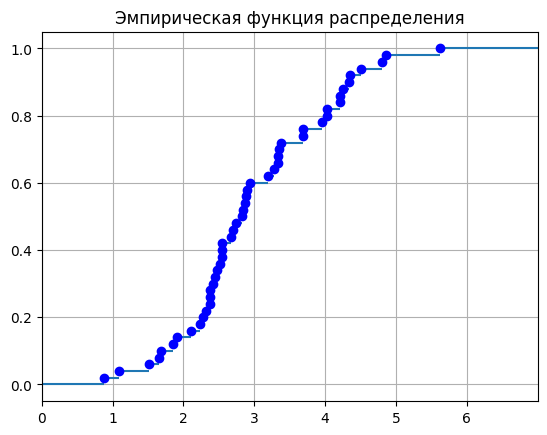

In [14]:
df2={}
for i in range(0, len(asort2)):
 df2.update({asort2[i]: float((i + 1) / n2)})
print(df2)
df2.update({-1: 0})
df2.update({7: 1})
plt.xlim(0, 7)
plt.title('Эмпирическая функция распределения')
plt.xticks([x for x in range(0, 7)])
plt.grid()
d2_un = [-1, *asort2, 7]
for i in range(0, n+1):
 plt.hlines(y=df2[d2_un[i]], xmin=d2_un[i], xmax=d2_un[i+1])
 plt.plot(d2_un[i], df2[d2_un[i]], marker='o', color='b')
plt.show()

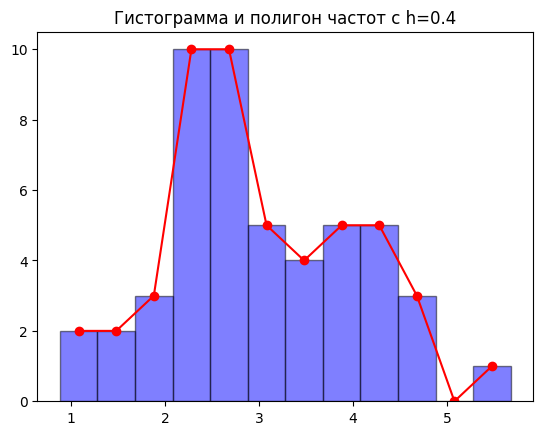

In [15]:
h=0.4
shag = np.arange(min(asort2), max(asort2) + h, h)
plt.hist(asort2, bins=shag,color='b',edgecolor='black', alpha=0.5, label='Гистограмма')
plt.title("Гистограмма и полигон частот с h=0.4")
hist, _ = np.histogram(asort2, bins=shag)
centers = 0.5 * (shag[1:] + shag[:-1])
plt.plot(centers, hist, color='red', marker='o', linestyle='-', label='Полигон')

**b) Вычислить выборочные аналоги следующих числовых характеристик: (i) математического ожидания, (ii)дисперсии, (iii) медианы, (iv)ассиметрии, (v)эксцесса, (vi)вероятности** $\mathbb{P}(X\in[c,d])$ **при** $c=2.60$ $d=3.20$

In [16]:
E2=sum(asort2)/n
print (E2)
deviations2 = [(x - E2) ** 2 for x in asort2] 
D2 = sum(deviations2) / n 
print (D2)
SKO2=D2**(1/2)
print (SKO2)
if n % 2: 
    Me2=(asort2)[n//2] 
else:
    Me2=sum((asort2)[n//2 - 1:n//2 + 1]) / 2 
print (Me2)
deviations2 = [(x - E2) ** 3 for x in asort2]
Skew2=sum(deviations2) / (n *(SKO2**3))
print (Skew2)
deviations2 = [(x - E2) ** 4 for x in asort2]
Kurt2=sum(deviations2) / (n *(SKO2**4))-3
print (Kurt2)
Sigma2=n*D2/(n-1)
print(Sigma2)
bias=-Sigma2/n
print(bias)

2.9976600000000007
1.0126833044
1.006321670441415
2.835
0.3406524429217586
-0.2265474718127063
1.033350310612245
-0.0206670062122449


b)$\mathbb{E}_\xi=\bar{x}=\cfrac{1}{n}\sum_{i=1}^nx_i=2.998$  
$\mathbb{D}_\xi=S^2=\cfrac{\sum_{i=1}^n(x_i-\bar x)^2}{n}=1.01$  
$\sigma=\sqrt{S^2}=1.006$  
$Me=\cfrac{x_{\cfrac{n}{2}}+x_{\cfrac{n}{2}+1}}{2}=2.835$  
$\widehat{Skew}=\cfrac{\cfrac{\sum_{i=1}^n(x_i-\bar x)^3}{n}}{S^3}=0.34$    
$\widehat{Kurt}=\cfrac{\cfrac{\sum_{i=1}^n(x_i-\bar x)^4}{n}}{S^4}-3=-0.227$   
$c=2.60$ $d=3.20$  
$\mathbb{P}(X\in[c,d])=F(d)-F(c)=0.62-0.42=0.2$

**c)В предположении, что исходные наблюдения являются выборкой из нормального распределения, построить ОМП и ОММ параметра $(a, \sigma^2)$.Найти смещение оценки.**

c) $x_1,\cdots x_{50}\sim \mathscr{N}(a,\sigma^2)$   
Оценка максимального правдоподобия параметров а и $\sigma^2$:  
$L(x_1, \cdots, x_{n};\theta) =(2\pi)^{-\cfrac{n}{2}}\sigma^{-n}exp(-\cfrac{1}{2\sigma^2}\sum_{i=1}^{n}x_i^2+\cfrac{a}{\sigma^2}\sum_{i=1}^{n}x_i-\cfrac{n a^2}{2\sigma^2})$  
$LL(x_1, \cdots, x_{n};\theta)=-\cfrac{n}{2}\ln2\pi-n \ln\sigma-(\cfrac{1}{2\sigma^2}\sum_{i=1}^{n}x_i^2+\cfrac{a}{\sigma^2}\sum_{i=1}^{n}x_i-\cfrac{n a^2}{2\sigma^2})$   
$\cfrac{\delta LL(x_1, \cdots, x_{n};\lambda)}{\delta a}=\cfrac{1}{\sigma^2}\sum_{i=1}^{n}(x_i-na)=0$    
$\widehat{a}=\bar{x}=2.998$  
$\cfrac{\delta LL(x_1, \cdots, x_{n};\lambda)}{\delta\sigma}=\cfrac{n}{\sigma}+\cfrac{1}{\sigma^3}\sum_{i=1}^{n}(x_i-na)^2=0$    
$\widehat{\sigma^2}=\cfrac{1}{n}\sum_{i=1}^{n}(x_i-na)^2=S^2=1.01$   
Оценка методом моментов параметров а и $\sigma^2$:   
Теоретический момент первого порядка нормального распределения: $\mathbb{E}(X_1)=a$  
Эмпирический момент первого порядка: $M_1=\bar{x}=\cfrac{1}{n}\sum_{i=1}^nx_i$  
Теоретический момент второго порядка нормального распределения: $\mathbb{E}(X_2)=a^2+\sigma^2$  
Эмпирический момент второго порядка: $M_2=\bar x^2=\cfrac{1}{n}\sum_{i=1}^{n}(x_i-na)^2$  
Тогда: $\widehat{a}=\bar{x}=2.998$   
$\widehat{\sigma^2}=\bar{x^2}-\bar x^2=S^2=1.01$  
$\widehat\theta=(\widehat{a},\widehat{\sigma^2})=(\bar{x},S^2)=(2.998,1.01)$ - ОМП  
$T=(\sum_{i=1}^nx_i,\sum_{i=1}^nx_i^2)$ - МДС и ПДС, так как нормальное распределение относится к экспоненциальному семейству.
$\mathbb{E}_\theta(\bar x)=\mathbb{E}_\theta\cfrac{1}{n}\sum_{i=1}^nx_i=\cfrac{1}{n}\mathbb{E}_{\theta}\sum_{i=1}^nx_1=\cfrac{1}{n}\cdot na=a=2.998$ - НРМД    
$\mathbb{E}_\theta(S^2)=\cfrac{1}{n}\sum_{i=1}^{n}(x_i-na)^2=\cfrac{na^2+n^2a^2+n^2a^2-na^2-n^2a^2}{n}=\cfrac{(n-1)\sigma^2}{n}$  
$\widetilde{\sigma^2}=\cfrac{n}{n-1}S^2=1.03$ - НРМД  
$bias_{\theta}(\sigma^2)=\mathbb{E}_\Theta(S^2)-\sigma^2=\cfrac{(n-1)\sigma^2}{n}-\sigma^2=-\cfrac{\sigma^2}{n}=-0.02$

**d) Построить доверительные интервалы уровня значимости** $\alpha_2\:(a, \sigma^2
)$.

In [17]:
left_bordera = E2 - (1.68 * SKO2/ math.sqrt(n-1))
right_bordera = E2 + (1.68 * SKO2 / math.sqrt(n-1))
print(left_bordera,right_bordera)
right_borders = n*D2/33.93
left_borders = n*D2/66.34
print(left_borders,right_borders)

2.7561427990940612 3.23917720090594
0.7632524151341574 1.4923125617447688


d) $\alpha_2=0.10$  
$\sqrt{n}\cfrac{\bar x-a}{S}\sim   N (0,1)$  
$G(\bar X,a)=\sqrt{n-1}\cfrac{\bar x-a}{S}\sim  S_{n-1}$   
$\mathbb{P}(-x_\alpha\leq\sqrt{n-1}\cfrac{\bar x-a}{S}\leq x_\alpha)=1-\alpha_2=0.9$  
$\mathbb{P}(\bar x-\cfrac{x_\alpha S}{\sqrt{n-1}}\leq a\leq\bar x+\cfrac{x_\alpha S}{\sqrt{n-1}})=2S_{n-1}=1-\alpha_2$  
$x_\alpha\approx 1.68$  
$[2.756, 3.239]\ni a$  
$G(\bar X,\sigma^2)=\cfrac{nS^2}{\sigma^2}\sim \mathscr X^2_{n-1}$  
$\mathbb{P}(x_{\alpha_1}\leq\cfrac{nS^2}{\sigma^2}\leq x_{\alpha_2})=1-\alpha_2=0.9$  
$\mathbb{P}(\cfrac{nS^2}{x_{\alpha_1}}\leq\sigma^2\leq\cfrac{nS^2}{x_{\alpha_2}})=1-\alpha_2=0.9$  
$x_{\alpha_1}: K_{n-1}(x_{\alpha_1})=\cfrac{\alpha}{2}   \;x_{\alpha_2}: K_{n-1}(x_{\alpha_2})=1-\cfrac{\alpha}{2}$  
$x_{\alpha_1}\approx 66.34$  $x_{\alpha_2}\approx33.93$  
$[0.763,1.492]\ni\sigma^2$

**e)Построение критерия значимости проверки простой гипотезы согласия с нормальным распределением с параметрами** $a_0=3.0 \:\sigma_0=1.0$ **с использованием теоремы Колмогорова. Проверка гипотезы на уровне значимости** $\alpha_2=0.1$. **Вычисление наименьшее значения уровня значимости, на котором ещё нет оснований отвергнуть гипотезу.**

In [18]:
alpha_2 = 0.1
a0=3.0
sigma0=1.0
sp.kstest(asort2, 'norm',args=(a0,sigma0))

KstestResult(statistic=0.12591299987187377, pvalue=0.37483734456058604, statistic_location=2.935, statistic_sign=1)

Был применен Kolmogorov-Smirnov тест для проверки нормальности распределения.  
Результат теста представляет собой кортеж, содержащий статистику теста и p-значение.  
Если p-значение меньше уровня значимости, то гипотеза о том, что данные имеют заданное распределение, отвергается.  
$p-value>\alpha_2=0.1$ - гипотезу не отвергаем  
$max \alpha=0.1$

**f)Используя гистограмму частот, построить критерий значимости** $\mathcal{X^{2}}$ **проверки простой гипотезы согласия с нормальным распределением с параметрами** $a_0=3.0 \:\sigma_0=1.0$. **Проверить гипотезу на урокень значимости** $\alpha_{2}=0.1$. **Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.**

In [19]:
I = [(0, 2), (2,3), (3,4), (4, 6)]
a0=3.0
sigma0=1.0
n_i = [7,23, 9, 11]
p_i = []
np_i = []
n_i_np_i = []
res = []
for i in I:
 p_i.append(round(sp.norm.cdf(i[1], loc=a0,scale=sigma0) - sp.norm.cdf(i[0], loc=a0,scale=sigma0), 4))
print(p_i)
for i in range (4):
 np_i.append(round(n*p_i[i], 4))
print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print(res, sum(res))
print(1 - sp.chi2.cdf(sum(res), 4))

[0.1573, 0.3413, 0.3413, 0.1573]
[7.865, 17.065, 17.065, 7.865]
[0.0951, 2.0641, 3.8116, 1.2496] 7.2204
0.12468948403248625


f) $a_0=3.00 \:\sigma_0=1.00\:\alpha_2=0.1$  
$I_{1}=\left(0,2 \right], n_{1}=7$  
$P_{1}=\frac{1}{\sqrt{2\pi}}exp\Biggl(-\frac{(2-3)^2}{2}\Biggr)-\frac{1}{\sqrt{2\pi}}exp\Biggl(-\frac{(0-3)^2}{2}\Biggr)=0.157\: nP_{1}=7.865$  
$I_{2}=\left(2,3\right], n_{2}=23$  
$P_{2}=\frac{1}{\sqrt{2\pi}}exp\Biggl(-\frac{(3-3)^2}{2}\Biggr)-\frac{1}{\sqrt{2\pi}}exp\Biggl(-\frac{(2-3)^2}{2}\Biggr)=0.341\: nP_{2}=17.065$  
$I_{3}=\left( 3,4 \right], n_{3}=9$  
$P_{3}=\frac{1}{\sqrt{2\pi}}exp\Biggl(-\frac{(4-3)^2}{2}\Biggr)-\frac{1}{\sqrt{2\pi}}exp\Biggl(-\frac{(3-3)^2}{2}\Biggr)=0.341\: nP_{3}=17.065$  
$I_{4}=\left(4,6\right], n_{4}=11$  
$P_{4}=\frac{1}{\sqrt{2\pi}}exp\Biggl(-\frac{(6-3)^2}{2}\Biggr)-\frac{1}{\sqrt{2\pi}}exp\Biggl(-\frac{(4-3)^2}{2}\Biggr)=0.157\: nP_{4}=7.865$  
Критерий $\mathcal{X}^{2}: \mathcal{X}^{2}_{набл}=\sum_{i=1}^{4}\frac{(n_{i}-np_{i})^{2}}{np_{i}} =7.22$  
$\mathcal{X}^{2}_{N-1,1-\alpha_{1}}=\mathcal{X}^{2}_{3,0.9}\simeq 6.251$  
$\mathcal{X}^{2}> \mathcal{X}^{2}_{3,0.9}$ - отвергаем гипотезу (критерий Пирсона)   
$F^{-1}_{\mathcal{X}^2_3}(1-\alpha)=\mathcal{X}^2$    
$\alpha=1-F_{\mathcal{X}^2_3}(\mathcal{X}^2)=0.125$ :

**g)Построить критерий значимости**  $\mathcal{X^{2}}$ **проверки сложной гипотезы согласия с нормальным распределением. Проверить гипотезу по уровню значимости** $\alpha_{2}=0.1$.**Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.**

In [20]:
I = [(0, 2), (2,3), (3,4), (4, 6)]
n_i = [7,23, 9, 11]
p_i = []
np_i = []
n_i_np_i = []
res = []
for i in range(4):
 p_i.append(round(1/(2*3.14*(1.01)**(0.5))*math.e**(-((float(I[i][1])-2.998)**2)/(2*1.01)) -1/(2*3.14*(1.01)**(0.5))*math.e**(-((I[i][0]-2.998)**2)/(2*1.01)), 4))
print(p_i)
for i in range (4):
 np_i.append(round(n*p_i[i], 4))
print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print(res, sum(res))
print(1 - sp.chi2.cdf(sum(res), 4))

[0.0949, 0.0617, -0.0621, -0.0946]
[4.745, 3.085, -3.105, -4.73]
[1.0717, 128.5599, -47.192, -52.3114] 30.128199999999985
4.608938298900078e-06


$\widehat a=\bar x=2.998 \:\widehat=S^2=1.01 - ОМП\:\alpha_2=0.1$  
$I_{1}=\left(0,2 \right], n_{1}=7$  
$P_{1}=\frac{1}{\sqrt{2\pi\cdot 1.01}}exp\Biggl(-\frac{(2-2.998)^2}{2\cdot 1.01}\Biggr)-\frac{1}{\sqrt{2\pi\cdot1.01}}exp\Biggl(-\frac{(0-2.998)^2}{2\cdot 1.01}\Biggr)=0.095\: nP_{1}=4.745$  
$I_{2}=\left(2,3\right], n_{2}=23$  
$P_{2}=\frac{1}{\sqrt{2\pi\cdot 1.01}}exp\Biggl(-\frac{(3-2.998)^2}{2\cdot 1.01}\Biggr)-\frac{1}{\sqrt{2\pi\cdot1.01}}exp\Biggl(-\frac{(3-2.998)^2}{2\cdot 1.01}\Biggr)=0.062\: nP_{2}=3.085$  
$I_{3}=\left( 3,4 \right], n_{3}=9$  
$P_{3}=\frac{1}{\sqrt{2\pi\cdot 1.01}}exp\Biggl(-\frac{(4-2.998)^2}{2\cdot 1.01}\Biggr)-\frac{1}{\sqrt{2\pi\cdot1.01}}exp\Biggl(-\frac{(3-2.998)^2}{2\cdot 1.01}\Biggr)=-0.062\: nP_{3}=-3.105$  
$I_{4}=\left(4,6\right], n_{4}=11$  
$P_{4}=\frac{1}{\sqrt{2\pi\cdot 1.01}}exp\Biggl(-\frac{(6-2.998)^2}{2\cdot 1.01}\Biggr)-\frac{1}{\sqrt{2\pi\cdot1.01}}exp\Biggl(-\frac{(4-2.998)^2}{2\cdot 1.01}\Biggr)=-0.095\: nP_{4}=-4.73$  
Критерий $\mathcal{X}^{2}: \mathcal{X}^{2}_{набл}=\sum_{i=1}^{4}\frac{(n_{i}-np_{i})^{2}}{np_{i}} =30.128$  
$\mathcal{X}^{2}_{N-1,1-\alpha_{1}}=\mathcal{X}^{2}_{3,0.9}\simeq 6.251$  
$\mathcal{X}^{2}> \mathcal{X}^{2}_{3,0.9}$ - отвергаем гипотезу (критерий Пирсона)   
$F^{-1}_{\mathcal{X}^2_3}(1-\alpha)=\mathcal{X}^2$    
$\alpha=1-F_{\mathcal{X}^2_3}(\mathcal{X}^2)=4.6\cdot 10^{-6}$ 

**h)Построить наиболее мощный критерий проверки простой гипотезы о нормальности с параметрами**$a_0=3.0 \:\sigma_0=1.0$ **при альтернативе нормальности с параметром** $a_1=1.0 \:\sigma_0=1.0$. **Проверить гипотезу на уровне значимости** $\alpha_2=0.1$

$H_0: F(x)\in N(a_0,\sigma^2);$  
$H_1:F(x)\in N(a_1,\sigma^2)$  
$L(\bar X,a)=(\cfrac{1}{\sqrt{2\pi\sigma^2}})^n\cdot exp\Biggl(-\cfrac{1}{2\sigma^2}\sum_{i=1}^n(x_{(i)}-a)^2\Biggr)$ 
$\Lambda(\bar X)=\cfrac{L(\bar X,a_1)}{L(\bar X,a_0)}=exp\Biggl(\cfrac{a_1-a_0}{\sigma^2}(\sum_{i=1}^n x_{(i)}-n\cfrac{a_0+a_1}{2})\Biggr)>c$ - $H_0$ отвергается  
$\cfrac{a_1-a_0}{\sigma^2}(\sum_{i=1}^n x_{(i)}-n\cfrac{a_0+a_1}{2})>\ln c$  
$\sum_{i=1}^n x_{(i)}<\cfrac{\sigma^2}{a_1-a_0}+n\cfrac{a_0+a_1}{2}=c^{'}$  
$T(X_n)=\sum_{i=1}^n x_{(i)}<c^{'}$  
$\alpha=P(T(X_n)<c^{'}|H_0)=1-\Phi(c^{'};na_0,n\sigma^2)=1-\Phi\Biggl(\cfrac{c^{'}-na+0}{\sqrt{n\sigma^2}}\Biggr)$  
$c^{'}=na_0+\sqrt{n\sigma^2}\Phi^{-1}(1-\alpha)$

**i.c)В предположении, что исходные наблюдения являются выборкой из распределения Лапласа, построить ОМП и ОММ параметров** $(a, \sigma^2)$.**Найти смещение оценки.**

i.c)$p_{a,\sigma}(x)=\cfrac{1}{\sqrt 2\sigma}exp\Biggl(-\cfrac{\sqrt 2}{\sigma}|x-a|\Biggr)$  
$L(x_1, \cdots, x_{n};\theta) =(\sqrt 2\sigma)^{-n}exp\Biggl(-\cfrac{\sqrt 2}{\sigma}\sum_{i=1}^n|x_{(i)}-a|\Biggr)$  
$L(x_1, \cdots, x_{n};\widehat a,\sigma)=-n \ln(\sqrt 2\sigma)(-\cfrac{\sqrt 2}{\sigma}\sum_{i=1}^n|x_{(i)}-a|)$  
$\cfrac{\delta LL}{\delta\sigma}=-\cfrac{n}{\sigma}+\cfrac{1}{\sigma^2}\sum_{i=1}^n|x_{(i)}-a|=0$  
$\widehat\sigma=\cfrac{1}{n}\sum_{i=1}^n|x_{(i)}-a|$  
$L(x_1, \cdots, x_{n};a,\widehat\sigma)=-\cfrac{1}{\sigma}\sum_{i=1}^n sign(x_{(i)}-a)=0$  
$\widehat a=Z_{n,\cfrac{1}{2}}=2.835$  
$\widehat\sigma^2=(\cfrac{1}{n}\sum_{i=1}^n|x_{(i)}-Z_{n,\cfrac{1}{2}}|)^2=0.63$  
Оценка методом моментов параметров а и $\sigma^2$:   
Теоретический момент первого порядка распределения: $\mathbb{E}(X_1)=a$   
Эмпирический момент первого порядка: $M_1=\bar{x}=Z_{n,\cfrac{1}{2}}$  
Теоретический момент второго порядка распределения: $\mathbb{E}(X_2)=\sigma^2$  
Эмпирический момент второго порядка: $M_2=\bar {x^2}-\bar x^2=\cfrac{1}{n^2}\sum_{i=1}^n|x_i-a|^2$  
$\widehat a=Z_{n,\cfrac{1}{2}}=2.835$    
$\widehat\sigma^2=(\cfrac{1}{n}\sum_{i=1}^n|x_{(i)}-Z_{n,\cfrac{1}{2}}|)^2=0.63$     
$T=(\sum_{i=1}^nx_i)$ - МДС и ПДС, так как распределение из семейства Лапласа относится к экспоненциальному семейству.  
$\mathbb{E}_\theta(Z_{n,\cfrac{1}{2}})=a=2.835$ - НРМД        
$\mathbb{E}_\theta(\cfrac{1}{n}\sum_{i=1}^n|x_{(i)}-Z_{n,\cfrac{1}{2}}|)^2)=\sigma^2$-нрмд   

In [34]:
deviations = [abs(x - Me2)  for x in asort2] 
sigma = sum(deviations) / n
print(sigma**2)

0.6325657155999999


In [22]:
left_bordera = 2.835 - (1.68 * (0.63)**(0.5)/ math.sqrt(n-1))
right_bordera = 2.835 + (1.68 * (0.63)**(0.5) / math.sqrt(n-1))
print(left_bordera,right_bordera)
right_borders = n*0.63/33.93
left_borders = n*0.63/66.34
print(left_borders,right_borders)

2.6445059056033493 3.0254940943966506
0.4748266505878806 0.9283819628647215


**i.d) Построить доверительные интервалы уровня значимости** $\alpha_2\:(a, \sigma^2).$

$\sqrt{n}\cfrac{\bar x-a}{S}\sim   N (0,1)$  
$G(\bar X,a)=\sqrt{n-1}\cfrac{\bar x-a}{S}\sim  S_{n-1}$   
$\mathbb{P}(-x_\alpha\leq\sqrt{n-1}\cfrac{\bar x-a}{S}\leq x_\alpha)=1-\alpha_2=0.9$  
$\mathbb{P}(\bar x-\cfrac{x_\alpha S}{\sqrt{n-1}}\leq a\leq\bar x+\cfrac{x_\alpha S}{\sqrt{n-1}})=2S_{n-1}=1-\alpha_2$  
$x_\alpha\approx 1.68$  
$[2.645, 3.025]\ni a$  
$G(\bar X,\sigma^2)=\cfrac{nS^2}{\sigma^2}\sim \mathscr X^2_{n-1}$  
$\mathbb{P}(x_{\alpha_1}\leq\cfrac{nS^2}{\sigma^2}\leq x_{\alpha_2})=1-\alpha_2=0.9$  
$\mathbb{P}(\cfrac{nS^2}{x_{\alpha_1}}\leq\sigma^2\leq\cfrac{nS^2}{x_{\alpha_2}})=1-\alpha_2=0.9$  
$x_{\alpha_1}: K_{n-1}(x_{\alpha_1})=\cfrac{\alpha}{2}   \;x_{\alpha_2}: K_{n-1}(x_{\alpha_2})=1-\cfrac{\alpha}{2}$  
$x_{\alpha_1}\approx 66.34$  $x_{\alpha_2}\approx33.93$  
$[0.475,0.928]\ni\sigma^2$

**i.e)Построение критерия значимости проверки простой гипотезы согласия с распределением Лапласа с параметрами** $a_0=3.0 \:\sigma_0=1.0$ **с использованием теоремы Колмогорова. Проверка гипотезы на уровне значимости** $\alpha_2=0.1$. **Вычисление наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть гипотезу.**

In [33]:
alpha_2 = 0.1
a0=3.0
sigma0=1.0
critic_value = kstwobign.ppf(1 - alpha_2/2) / np.sqrt(len(a2))
print(critic_value)
sp.kstest(asort2, 'laplace',args=(a0,sigma0))  

0.19206415147703973


KstestResult(statistic=0.13146626831129826, pvalue=0.3243099003222637, statistic_location=2.935, statistic_sign=1)

Был применен Kolmogorov-Smirnov тест для проверки нормальности распределения.  
Результат теста представляет собой кортеж, содержащий статистику теста и p-значение.  
Если p-значение меньше уровня значимости, то гипотеза о том, что данные имеют заданное распределение, отвергается.  
$p-value>\alpha_2=0.1$ - гипотезу не отвергаем  
$max \alpha=0.1$

**i.f)Построить критерий значимости** $\mathcal{X^{2}}$ **проверки простой гипотезы согласия с распределением Лапласа с параметрами** $a_0=3.0 \:\sigma_0=1.0$. **Проверить гипотезу на урокень значимости** $\alpha_{2}=0.1$. **Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.**

In [25]:
def lapl(x, a,sigma):
 res_g = 0
 for i in range(0, x + 1):
     res_g += 1/(((2*3.14)**(0.5))*sigma)*math.e**(-((2**(0.5))*abs(i-a))/sigma)
 return res_g
[(0, 2), (2,3), (3,4), (4, 6)]
a0=3.0
sigma0=1.0
n_i = [7,23, 9, 11]
p_i = []
np_i = []
n_i_np_i = []
res = []
p_i.append(lapl(0, a0,sigma0))
for i in range(1, len(n_i)):
 p_i.append(round(lapl(I[i][1], a0,sigma0) - lapl(I[i][0], a0,sigma0), 4))
print(p_i)
for i in range(4):
 np_i.append(round(p_i[i]*n, 4))
print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
res, sum(res)
print(res)
print(sum(res))
print(1 - sp.chi2.cdf(sum(res), 4))

[0.005734093087438325, 0.399, 0.097, 0.0293]
[0.2867, 19.95, 4.85, 1.465]
[157.1971, 0.4663, 3.551, 62.0589]
223.27329999999998
0.0


i.f) $a_0=3.00 \:\sigma_0=1.00\:\alpha_2=0.1$  
$I_{1}=\left(0,2 \right], n_{1}=7$  
$P_{1}=\frac{1}{\sqrt{2}}exp\Biggl(-\sqrt2|2-3|)\Biggr)-\frac{1}{\sqrt{2}}exp\Biggl(-\sqrt2|0-3|)\Biggr)=0.006\: nP_{1}=0.287$  
$I_{2}=\left(2,3\right], n_{2}=23$  
$P_{2}=\frac{1}{\sqrt{2}}exp\Biggl(-\sqrt2|3-3|)\Biggr)-\frac{1}{\sqrt{2}}exp\Biggl(-\sqrt2|2-3|)\Biggr)=0.024\: nP_{2}=1.18$  
$I_{3}=\left( 3,4 \right], n_{3}=9$  
$P_{3}=\frac{1}{\sqrt{2}}exp\Biggl(-\sqrt2|4-3|)\Biggr)-\frac{1}{\sqrt{2}}exp\Biggl(-\sqrt2|3-3|)\Biggr)=0.097\: nP_{3}=4.85$  
$I_{4}=\left(4,6\right], n_{4}=11$  
$P_{4}=\frac{1}{\sqrt{2}}exp\Biggl(-\sqrt2|6-3|)\Biggr)-\frac{1}{\sqrt{2}}exp\Biggl(-\sqrt2|4-3|)\Biggr)=0.399\: nP_{4}=19.95$  
Критерий $\mathcal{X}^{2}: \mathcal{X}^{2}_{набл}=\sum_{i=1}^{4}\frac{(n_{i}-np_{i})^{2}}{np_{i}} =568.248$  
$\mathcal{X}^{2}_{N-1,1-\alpha_{1}}=\mathcal{X}^{2}_{3,0.9}\simeq 16.27$  
$\mathcal{X}^{2}\gg \mathcal{X}^{2}_{3,0.9}$ - отвергаем гипотезу (критерий Пирсона)   
$F^{-1}_{\mathcal{X}^2_3}(1-\alpha)=\mathcal{X}^2$    
$\alpha=1-F_{\mathcal{X}^2_3}(\mathcal{X}^2)\ll 0.0$ :

**i.g)Построить критерий значимости**  $\mathcal{X^{2}}$ **проверки сложной гипотезы согласия с распределением Лапласа. Проверить гипотезу по уровню значимости** $\alpha_{2}=0.1$.**Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.**

In [23]:
I = [(0, 2), (2,3), (3,4), (4, 6)]
n_i = [7,23, 9, 11]
p_i = []
np_i = []
n_i_np_i = []
res = []
for i in range(4):
 p_i.append(round(1/((2*3.14*0.63)**(0.5))*math.e**(-((2**(0.5))*abs(I[i][1]-2.835))/((0.63)**(0.5)) -1/((2*3.14*0.63)**(0.5))*math.e**(-((2**(0.5))*abs(I[i][0]-2.835))/((0.63)**(0.5)))), 4))
print(p_i)
for i in range (4):
 np_i.append(round(n*p_i[i], 4))
print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print(res, sum(res))
print(1 - sp.chi2.cdf(sum(res), 4))

[0.1132, 0.3345, 0.0434, 0.0017]
[5.66, 16.725, 2.17, 0.085]
[0.3172, 2.3543, 21.4972, 1401.6144] 1425.7830999999999
0.0


$\widehat a=Z_{n,\cfrac{1}{2}}=2.835\:\widehat\sigma^2=(\cfrac{1}{n}\sum_{i=1}^n|x_{(i)}-Z_{n,\cfrac{1}{2}}|)^2=0.63 - ОМП\:\alpha_2=0.1$  
$I_{1}=\left(0,2 \right], n_{1}=7$  
$P_{1}=\frac{1}{\sqrt{2\cdot 0.63}}exp\Biggl(-\cfrac{\sqrt2|2-2.835|}{\sqrt {0.63}})\Biggr)-\frac{1}{\sqrt{2\cdot 0.63}}exp\Biggl(-\cfrac{\sqrt2|0-2.835|}{\sqrt {0.63}})\Biggr)=0.113\: nP_{1}=5.66$  
$I_{2}=\left(2,3\right], n_{2}=23$  
$P_{2}=\frac{1}{\sqrt{2\cdot 0.63}}exp\Biggl(-\cfrac{\sqrt2|3-2.835|}{\sqrt {0.63}})\Biggr)-\frac{1}{\sqrt{2\cdot 0.63}}exp\Biggl(-\cfrac{\sqrt2|2-2.835|}{\sqrt {0.63}})\Biggr)=0.335\: nP_{2}=16.725$  
$I_{3}=\left( 3,4 \right], n_{3}=9$  
$P_{3}=\frac{1}{\sqrt{2\cdot 0.63}}exp\Biggl(-\cfrac{\sqrt2|4-2.835|}{\sqrt {0.63}})\Biggr)-\frac{1}{\sqrt{2\cdot 0.63}}exp\Biggl(-\cfrac{\sqrt2|3-2.835|}{\sqrt {0.63}})\Biggr)=0.043\: nP_{3}=2.17$  
$I_{4}=\left(4,6\right], n_{4}=11$  
$P_{4}=\frac{1}{\sqrt{2\cdot 0.63}}exp\Biggl(-\cfrac{\sqrt2|6-2.835|}{\sqrt{0.63}})\Biggr)-\frac{1}{\sqrt{2\cdot 0.63}}exp\Biggl(-\cfrac{\sqrt2|4-2.835|}{\sqrt {0.63}})\Biggr)=0.002\: nP_{4}=0.085$  
Критерий $\mathcal{X}^{2}: \mathcal{X}^{2}_{набл}=\sum_{i=1}^{4}\frac{(n_{i}-np_{i})^{2}}{np_{i}} =1425.783$  
$\mathcal{X}^{2}_{N-1,1-\alpha_{1}}=\mathcal{X}^{2}_{3,0.9}\simeq 16.27$  
$\mathcal{X}^{2}\gg \mathcal{X}^{2}_{3,0.9}$ - отвергаем гипотезу (критерий Пирсона)   
$F^{-1}_{\mathcal{X}^2_3}(1-\alpha)=\mathcal{X}^2$    
$\alpha=1-F_{\mathcal{X}^2_3}(\mathcal{X}^2)\ll 0.0$ :

## Выводы
Врезультате выполненияе практической работ №2ымною были изучены  метоыв математической статистики для решения задач статистического анализатакже были ,сформировныь навыки реализацииэтих  методов с помощью средств языка Pythonв. Изучив основные концепции и метод,овладелаи навыками проведения статистических тестов, анализа выборочных данных, построения доверительных интервалов, проверки гипотезc помощью различных критериево.Для разных семейств распределенийбыли по стреныи оценки, асимптотические интервалы, гипотезы. Одновременно с этим, на практике применяли программные пакеты, такие как Python с библиотеками NumPy, Scip, Mathplot...